<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/reservoir/simplereservoir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#@title A simplified reservoir simulation model
#@markdown In this section we will use a simplified reservoir simulation model based in constant volume - temperature flashes. This will be used for developing fluid input to further gas processing calculations.
#@markdown <br><br>This document is part of the module ["Introduction to Gas Processing using NeqSim in Colab"](https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/examples_of_NeqSim_in_Colab.ipynb#scrollTo=_eRtkQnHpL70).
#%%capture
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *
from neqsim.process.processTools import simplereservoir
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use('classic')
%matplotlib inline


Text(0, 0.5, 'Total production [MSm3 oe]')

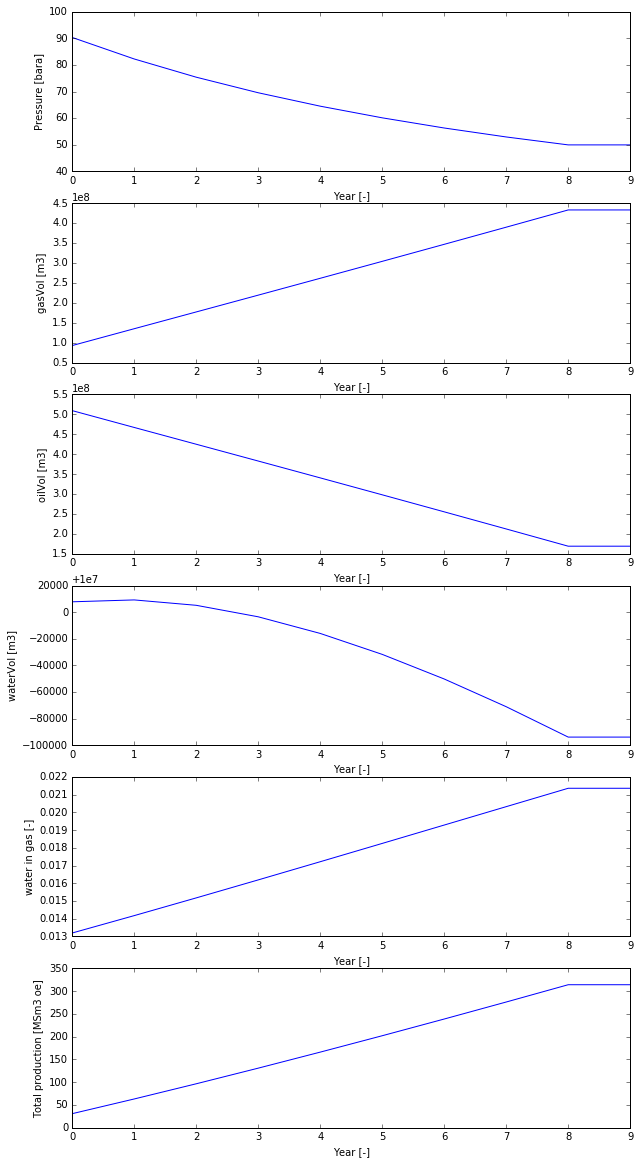

In [5]:
fluid1 = fluid('srk')
fluid1.addComponent("nitrogen", 0.100)
fluid1.addComponent("methane", 30.00)
fluid1.addComponent("ethane", 1.0)
fluid1.addComponent("propane", 1.0)
fluid1.addComponent("i-butane", 1.0)
fluid1.addComponent("n-butane", 1.0)
fluid1.addComponent("n-hexane", 0.1)
fluid1.addComponent("n-heptane", 0.1)
fluid1.addComponent("n-nonane", 1.0)
fluid1.addComponent("nC10", 1.0)
fluid1.addComponent("nC12", 3.0)
fluid1.addComponent("nC15", 3.0)
fluid1.addComponent("nC20", 3.0)
fluid1.addComponent("water", 11.0)
fluid1.setMixingRule(2)
fluid1.setMultiPhaseCheck(True)

fluid1.setPressure(100.0, 'bara')
fluid1.setTemperature(100.0, 'C')

TPflash(fluid1)

reservoirOps = simplereservoir(fluid1, "Well 1 reservoir", gasvolume=5.0 * 1e7, oilvolume=552.0 * 1e6, watervolume=10.0e6)

producedGasStream = reservoirOps.addGasProducer("SLP_A32562G")
producedGasStream.setFlowRate(0.01, "MSm3/day")

injectionGasStream = reservoirOps.addGasInjector("SLP_A32562GI")
injectionGasStream.setFlowRate(0.1, "MSm3/day")

injectionWaterStream = reservoirOps.addWaterInjector("SLP_A32562W")
injectionWaterStream.setFlowRate(1000000.1, "kg/day")

producedOilStream = reservoirOps.addOilProducer("SLP_A32562O")
producedOilStream.setFlowRate(50000000.0, "kg/day")


deltat = 24*60*60.0*365
time = []
pressure = []
gasvolume = []
watervolume = []
oilvolume = []
wateringas = []
totalproducedoe = []

for t in range(10):
    reservoirOps.runTransient(deltat)
    time.append(t*deltat/(24*60*60.0*365))
    pressure.append(reservoirOps.getReservoirFluid().getPressure('bara'))
    gasvolume.append(reservoirOps.getReservoirFluid().getPhase("gas").getVolume("m3"))
    oilvolume.append(reservoirOps.getReservoirFluid().getPhase("oil").getVolume("m3"))
    watervolume.append(reservoirOps.getReservoirFluid().getPhase("aqueous").getVolume("m3"))
    wateringas.append(reservoirOps.getReservoirFluid().getPhase("gas").getComponent('water').getx())
    totalproducedoe.append(reservoirOps.getProductionTotal('MSm3 oe'))


plt.rcParams['figure.figsize'] = [10, 20]
fig, ax = plt.subplots()
plt.subplot(6, 1, 1)
plt.plot(time, pressure)
plt.xlabel('Year [-]')
plt.ylabel('Pressure [bara]')
plt.subplot(6, 1, 2)
plt.plot(time, gasvolume)
plt.xlabel('Year [-]')
plt.ylabel('gasVol [m3]')
plt.subplot(6, 1, 3)
plt.plot(time, oilvolume)
plt.xlabel('Year [-]')
plt.ylabel('oilVol [m3]')
plt.subplot(6, 1, 4)
plt.plot(time, watervolume)
plt.xlabel('Year [-]')
plt.ylabel('waterVol [m3]')
plt.subplot(6, 1, 5)
plt.plot(time, wateringas)
plt.xlabel('Year [-]')
plt.ylabel('water in gas [-]')
plt.subplot(6, 1, 6)
plt.plot(time, totalproducedoe)
plt.xlabel('Year [-]')
plt.ylabel('Total production [MSm3 oe]')



